# Correlation

If someone told me that two variables were statistically related, I would expect that a change in one of the variables would lead to a predictable (positive or negative) change in the other. One way to describe the relatedness of two variables is by calculating the correlation coefficient. There are several types of correlation coefficients. The result is always between -1 and 1. Values closer to 1 or -1 indicate a stronger relationship.

The Pearson correlation coefficient is a common measure of linear correlation between two variables. The Pearson correlation coefficient is calculated as the covariance of two variables divided by the product of their standard deviations.The result is always between -1 and 1. Values closer to 1 or -1 indicate a stronger relationship, more variance in y can be explain by x, and values closer to zero indicate a weaker relationship between variables.

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [3]:
#Read WDI data into a pandas dataframe
wdi_df = pd.read_csv('WDIData.csv')

#There are region names included in the country column and I only want to look at countries
#Using the WDICountry.csv to get a list of countries only
wdi_country_df = pd.read_csv('WDICountry.csv')
#getting list of only countries and not regions
country_only = wdi_country_df.dropna(subset=['Region'])
country_only = country_only['Table Name']
#print(country_only)
#filtering out regions
wdi_df = wdi_df.loc[wdi_df['Country Name'].isin(country_only)]

In [4]:
#make a functon that return a new df from a list of indicatior values and a year as string
def get_ind_df(df, indi_list, year):
    new_df = df[['Country Name','Indicator Name',year]]
    d = {'Country Name': new_df['Country Name'].unique()}
    output_df = pd.DataFrame(data=d)
    for indi in indi_list:
        temp_df = new_df[new_df['Indicator Name']== indi]
        temp_df = temp_df.rename(columns={ year : indi +' '+ year})
        temp_df = temp_df[['Country Name', indi +' '+ year]]
        output_df = output_df.merge(temp_df, how='outer', on='Country Name' )
    return output_df


#make a functon that return a new log transformed df from a list of indicatior values and a year as string
def get_ind_df_transformed(df, indi_list, year):
    new_df = df[['Country Name','Indicator Name',year]]
    d= {'Country Name': new_df['Country Name'].unique()}
    output_df = pd.DataFrame(data=d)
    for indi in indi_list:
        temp_df = new_df[new_df['Indicator Name']== indi]
        temp_df[indi +' '+ year] = np.log(temp_df[year])
        #temp_df = temp_df.rename(columns={ year : indi +' '+ year})
        temp_df = temp_df[['Country Name', indi +' '+ year]]
        output_df = output_df.merge(temp_df, how='outer', on='Country Name' )
    return output_df

I used the WDI dataset to explore correlation between varriables. I looked at measures of CO2 emissions and other variables that I thought might have some positive or negative relationship with CO2 emissions. I used pandas .corr method to calculate the Pearson correlation coefficient between pairs of variables to evaluate relatedness of the variables. The Pearson Correlation coefficient is a measure of linear correlation between two variables. It is the ratio between the covariance of two variables and the product of their standard deviations (a normalized measurement of the covariance). 

Let's look at some correlation coefficients by broad indicator category.


In [5]:
#this cell gets a list of the top 30 countries by GPD per capita in 2015
#CO2 emissions are highlt correlated with GDP and population so I wanted to campare results using all countries and only countries on this list

indi_list = [ 'CO2 emissions (metric tons per capita)','Population, total','GDP (current US$)']
source = get_ind_df(wdi_df, indi_list, '2015')
source['GDP per capita (current US$) 2015'] = source['GDP (current US$) 2015']/source['Population, total 2015']
source = source.nlargest(30, 'GDP per capita (current US$) 2015')
high_gdp_per_list = source['Country Name'].tolist()
print(high_gdp_per_list)

['Liechtenstein', 'Monaco', 'Luxembourg', 'Bermuda', 'Isle of Man', 'Switzerland', 'Cayman Islands', 'Macao SAR, China', 'Norway', 'Qatar', 'Ireland', 'United States', 'Australia', 'Singapore', 'Faroe Islands', 'Denmark', 'Iceland', 'Sweden', 'United Kingdom', 'Netherlands', 'Greenland', 'Austria', 'Canada', 'Finland', 'San Marino', 'Hong Kong SAR, China', 'Germany', 'Belgium', 'United Arab Emirates', 'New Zealand']


In [6]:
#Energy
indi_list = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)','Energy use (kg of oil equivalent per capita)',
             'Renewable electricity output (% of total electricity output)','Electricity production from nuclear sources (% of total)', 
             'Electricity production from coal sources (% of total)','Renewable energy consumption (% of total final energy consumption)',
              'Electricity production from natural gas sources (% of total)','Alternative and nuclear energy (% of total energy use)',
              'Fossil fuel energy consumption (% of total)']
              
new_ind_df= get_ind_df(wdi_df, indi_list, '2015') #some indicators are only in 2015 like renewable energy and Energy use
#new_ind_df = new_ind_df[new_ind_df['Country Name'] != 'China']
#new_ind_df = new_ind_df[new_ind_df['Country Name'] != 'United States']
#new_ind_df = new_ind_df.loc[new_ind_df['Country Name'].isin(high_gdp_per_list)]
#print(new_ind_df.head())

#pearson : standard correlation coefficient
corr_df = new_ind_df.corr(method='pearson')
corr_df = corr_df.iloc[:, 0:2]
corr_df

,CO2 emissions (kt) 2015,CO2 emissions (metric tons per capita) 2015
CO2 emissions (kt) 2015,1.000000,0.177665
CO2 emissions (metric tons per capita) 2015,0.177665,1.000000
Energy use (kg of oil equivalent per capita) 2015,0.129602,0.341627
Renewable electricity output (% of total electricity output) 2015,-0.081838,-0.308210
Electricity production from nuclear sources (% of total) 2015,0.009745,-0.231230
Electricity production from coal sources (% of total) 2015,0.273735,0.077639
Renewable energy consumption (% of total final energy consumption) 2015,-0.130136,-0.534918
Electricity production from natural gas sources (% of total) 2015,-0.028782,0.435019
Alternative and nuclear energy (% of total energy use) 2015,-0.120053,-0.356142
Fossil fuel energy consumption (% of total) 2015,0.228820,0.224303


In [7]:
#People and poverty
indi_list = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)','GDP (current US$)','Literacy rate, youth female (% of females ages 15-24)',
             'Population, total','Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)','Access to clean fuels and technologies for cooking (% of population)',
              'Access to electricity (% of population)','Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Rural population (% of total population)']

new_ind_df= get_ind_df(wdi_df, indi_list, '2015') 
#new_ind_df = new_ind_df[new_ind_df['Country Name'] != 'China']
#new_ind_df = new_ind_df[new_ind_df['Country Name'] != 'United States']
#new_ind_df = new_ind_df.loc[new_ind_df['Country Name'].isin(high_gdp_per_list)]
#print(new_ind_df.head())

#pearson : standard correlation coefficient
corr_df = new_ind_df.corr(method='pearson')
corr_df = corr_df.iloc[:, 0:2]
corr_df

,CO2 emissions (kt) 2015,CO2 emissions (metric tons per capita) 2015
CO2 emissions (kt) 2015,1.000000,0.177665
CO2 emissions (metric tons per capita) 2015,0.177665,1.000000
GDP (current US$) 2015,0.830580,0.238310
"Literacy rate, youth female (% of females ages 15-24) 2015",0.307127,0.322519
"Population, total 2015",0.807873,0.012257
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population) 2015,-0.083570,-0.414926
Access to clean fuels and technologies for cooking (% of population) 2015,0.091886,0.576661
Access to electricity (% of population) 2015,0.120528,0.474128
"Adolescent fertility rate (births per 1,000 women ages 15-19) 2015",-0.151579,-0.513735
Rural population (% of total population) 2015,-0.082988,-0.578435


In [8]:
#industry and transportation
indi_list = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'Air transport, passengers carried',
            'Air transport, freight (million ton-km)', 'Rail lines (total route-km)', 'Container port traffic (TEU: 20 foot equivalent units)',
            'Agriculture, forestry, and fishing, value added (% of GDP)','CO2 emissions from liquid fuel consumption (kt)']

new_ind_df= get_ind_df(wdi_df, indi_list, '2015') 
#new_ind_df = new_ind_df.loc[new_ind_df['Country Name'].isin(high_gdp_per_list)]
#print(new_ind_df.head())

#pearson : standard correlation coefficient
corr_df = new_ind_df.corr(method='pearson')
corr_df = corr_df.iloc[:, 0:2]
corr_df

,CO2 emissions (kt) 2015,CO2 emissions (metric tons per capita) 2015
CO2 emissions (kt) 2015,1.000000,0.177665
CO2 emissions (metric tons per capita) 2015,0.177665,1.000000
"Air transport, passengers carried 2015",0.801659,0.256895
"Air transport, freight (million ton-km) 2015",0.712531,0.398806
Rail lines (total route-km) 2015,0.699387,0.444400
Container port traffic (TEU: 20 foot equivalent units) 2015,0.929195,0.167767
"Agriculture, forestry, and fishing, value added (% of GDP) 2015",-0.092977,-0.533735
CO2 emissions from liquid fuel consumption (kt) 2015,0.851435,0.251855


In [9]:
#land use and wildlife
indi_list = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)','Agricultural land (% of land area)',
              'Forest area (% of land area)','Terrestrial protected areas (% of total land area)',
              'Total natural resources rents (% of GDP)','Fertilizer consumption (kilograms per hectare of arable land)',
              'Bird species, threatened', 'Mammal species, threatened', 'Fish species, threatened']

new_ind_df= get_ind_df(wdi_df, indi_list, '2018') #some indicators are only in 2018 like threatened species
#new_ind_df = new_ind_df.loc[new_ind_df['Country Name'].isin(high_gdp_per_list)]
#print(new_ind_df.head())

#pearson : standard correlation coefficient
corr_df = new_ind_df.corr(method='pearson')
corr_df = corr_df.iloc[:, 0:2]
corr_df

,CO2 emissions (kt) 2018,CO2 emissions (metric tons per capita) 2018
CO2 emissions (kt) 2018,1.000000,0.178414
CO2 emissions (metric tons per capita) 2018,0.178414,1.000000
Agricultural land (% of land area) 2018,0.063343,-0.269157
Forest area (% of land area) 2018,-0.027379,-0.081702
Terrestrial protected areas (% of total land area) 2018,-0.027242,0.094676
Total natural resources rents (% of GDP) 2018,-0.037031,0.191733
Fertilizer consumption (kilograms per hectare of arable land) 2018,0.054129,0.369904
"Bird species, threatened 2018",0.367078,-0.053020
"Mammal species, threatened 2018",0.298406,-0.113635
"Fish species, threatened 2018",0.447912,-0.022348


 Looks like total CO2 emissions are highly corelated with population and GDP. 

There are not many variables in the list that are highly corelated with CO2 per capita. Some correlated variables include Renewable energy consumption (% of total final energy consumption) 2015, Rural population (% of total population) 2015, and Agriculture, forestry, and fishing, value added (% of GDP) 2015.

In [ ]:
#looking at another way to calculate correlation coefficient 
#these x and y values are from Anscombe's quartet
x=[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y=[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

one = np.array([x,y])
#print(one)

#print(np.cov(one))
#print(np.std(x))
#print(np.std(y))
#print(5.501/(np.std(x)*np.std(y)))
print(np.corrcoef(one)) #This returns the correlation coefficient matrix of the variables. Correlation coefficients between x and y are on the off diagonal.


[[1.         0.81642052]
 [0.81642052 1.        ]]


In [ ]:
#kendall : Kendall Tau correlation coefficient
corr_df_k = new_ind_df.corr(method='kendall')
corr_df_k = corr_df_k.iloc[:, 0:1]
#corr_df_k

Kendall Tau correlation coefficient is a measure of rank correlation or the similarity of the orderings of the data when ranked. 

In [ ]:
# spearman : Spearman rank correlation
corr_df_s = new_ind_df.corr(method='spearman')
corr_df_s = corr_df_s.iloc[:, 0:1]
#corr_df_s

Spearman rank correlation assesses how well the relationship between two ranks can be described using a monotonic function. A monotonic function is a function between ordered sets that preserves or reverses the given order.

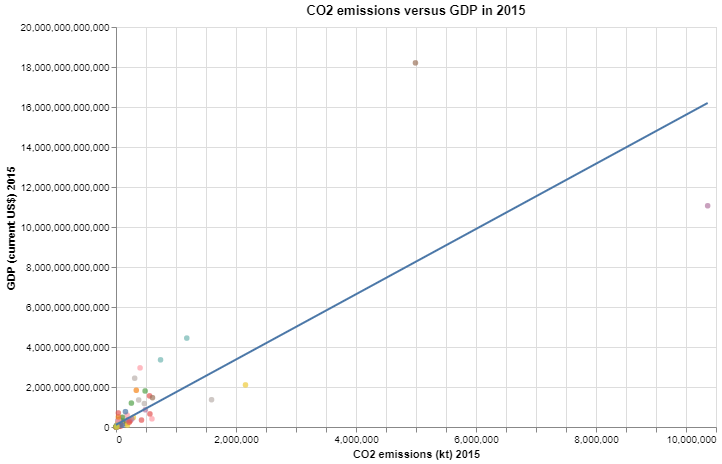

In [11]:
# lets look at a strongish positive correlation
indi_list = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)','GDP (current US$)']
new_ind_df= get_ind_df(wdi_df, indi_list, '2015') 
#new_ind_df = new_ind_df[new_ind_df['Country Name'] != 'China']
#new_ind_df = new_ind_df[new_ind_df['Country Name'] != 'United States']

chart= alt.Chart(new_ind_df).mark_circle().encode(
    x = alt.X('CO2 emissions (kt) 2015'),
    y = alt.Y('GDP (current US$) 2015'),
    color = alt.Color('Country Name:N', legend=None),
    tooltip ='Country Name'
).properties(width=600, height=400, title='CO2 emissions versus GDP in 2015' )

#Here is a linear regression fit using ordinary least squares which minimizes distance between data points and the line
chart1=(chart + chart.transform_regression('CO2 emissions (kt) 2015', 'GDP (current US$) 2015').mark_line())
chart1


I added a regression line fit using the ordinary least squares method. This method produces a function that minimizes the sum of the squares of the differences between the observed variable in the data and the output of the linear function.

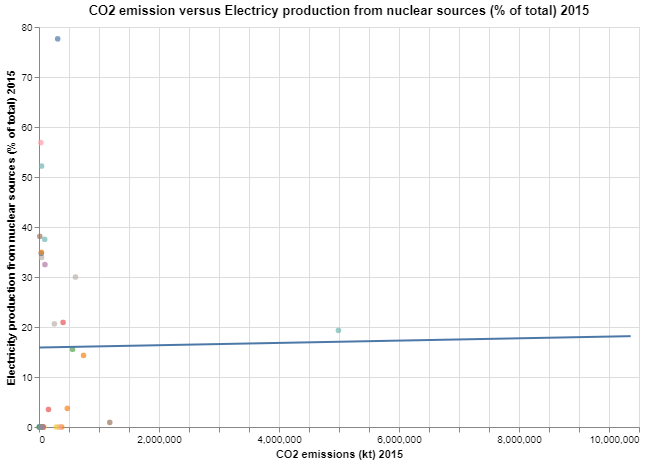

In [13]:
# lets look at a very weak positive correlation
indi_list = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)','GDP (current US$)','Electricity production from nuclear sources (% of total)']
new_ind_df= get_ind_df(wdi_df, indi_list, '2015') 
#print(new_ind_df)

chart= alt.Chart(new_ind_df).mark_circle().encode(
    x = alt.X('CO2 emissions (kt) 2015'),
    y = alt.Y('Electricity production from nuclear sources (% of total) 2015'),
    color = alt.Color('Country Name:N', legend=None),
    tooltip ='Country Name'
).properties(width=600, height=400, title='CO2 emission versus Electricy production from nuclear sources (% of total) 2015' )

#Here is a linear regression fit using ordinary least squares which minimizes distance between data points and the line
chart2 =(chart + chart.transform_regression('CO2 emissions (kt) 2015', 'Electricity production from nuclear sources (% of total) 2015').mark_line())
chart2


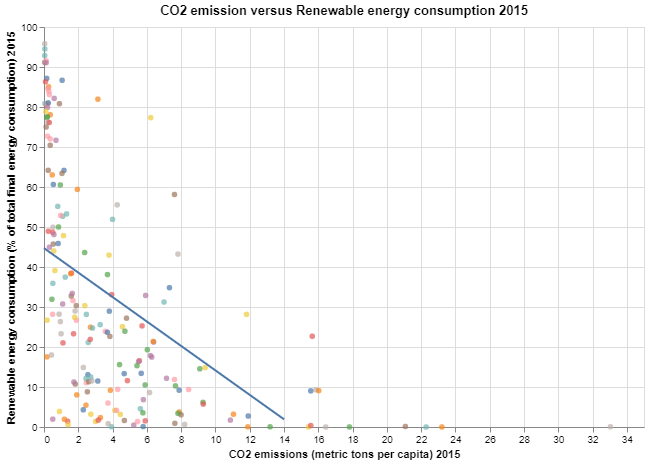

In [15]:
# lets look at a negative correlation
indi_list = ['CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)','Renewable energy consumption (% of total final energy consumption)']
new_ind_df= get_ind_df(wdi_df, indi_list, '2015') 
#print(new_ind_df)

chart= alt.Chart(new_ind_df).mark_circle().encode(
    x = alt.X('CO2 emissions (metric tons per capita) 2015'),
    y = alt.Y('Renewable energy consumption (% of total final energy consumption) 2015',scale=alt.Scale(domain=[0, 100])),
    color = alt.Color('Country Name:N', legend=None),
    tooltip ='Country Name'
).properties(width=600, height=400, title='CO2 emission versus Renewable energy consumption 2015' )

#Here is a linear regression fit using ordinary least squares which minimizes distance between data points and the line
chart3 = (chart + chart.transform_regression('CO2 emissions (metric tons per capita) 2015', 'Renewable energy consumption (% of total final energy consumption) 2015',
extent=[0, 14]).mark_line())
chart3


In [ ]:
#Dependencies
%load_ext watermark
%watermark
%watermark --iversions


Last updated: 2023-03-16T16:16:51.343912-04:00

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit

numpy : 1.22.3
altair: 4.2.0
pandas: 1.4.2

